# Latar Belakang
Sejak didirikan pada tahun 1971, New York City Taxi and Limousine Commission (TLC) telah berperan penting dalam mengatur industri transportasi umum berbayar di kota New York, yang mencakup taksi medali (taksi kuning ikonik New York), kendaraan sewa (seperti layanan antar-jemput komunitas, black car, dan limusin mewah), van komuter, dan kendaraan paratransit. Sebagai badan pengatur utama, TLC menetapkan standar tinggi bagi lebih dari 200.000 pemegang lisensi TLC yang beroperasi setiap hari, dengan jumlah perjalanan mencapai sekitar 1.000.000 perjalanan di seluruh kota. 

TLC kini menghadapi tantangan besar. Kota ini mengalami pertumbuhan jumlah penumpang yang sangat pesat, dan tren perjalanan di berbagai wilayah terus berubah. Dengan hampir satu juta perjalanan setiap hari, manajemen TLC berupaya untuk menjaga keseimbangan antara jumlah kendaraan di jalan dan permintaan transportasi di berbagai wilayah. Hal ini terutama penting mengingat kebutuhan pengaturan rute dan distribusi kendaraan sesuai dengan zona permintaan yang bervariasi, baik untuk menghindari penumpukan kendaraan di satu wilayah maupun untuk memastikan aksesibilitas di wilayah lain.

Sumber: [Di sini](https://www.nyc.gov/site/tlc/about/about-tlc.page).


# Stake Holder
**Manajer Operasional Armada**: Memiliki peran utama dalam mengoordinasikan distribusi dan mobilitas armada, memastikan armada selalu tersedia di area dengan permintaan tinggi untuk meminimalkan biaya operasional.

# Goal
Goals dari data analysis ini adalah:

1. Mengidentifikasi wilayah dengan kebutuhan armada tinggi: Menentukan wilayah mana yang memerlukan perhatian khusus dalam distribusi kendaraan agar armada lebih merata dan tersedia di area dengan permintaan tinggi.
  
2. Menganalisis penyesuaian harga yang tepat: Menentukan wilayah atau periode waktu yang mungkin memerlukan penyesuaian tarif, baik untuk meningkatkan efisiensi maupun untuk mengendalikan permintaan.

3. Merekomendasikan layanan tambahan yang dibutuhkan: Mengidentifikasi layanan tambahan yang dapat meningkatkan pengalaman pengguna dan memenuhi kebutuhan unik di setiap wilayah.

4. Meningkatkan efisiensi operasional: Menggunakan data untuk membantu mengurangi biaya operasional melalui distribusi armada yang optimal, pengelolaan permintaan yang lebih akurat, dan peningkatan layanan yang sesuai dengan pola perjalanan warga.



# Pernyataan Masalah
Dalam upaya menciptakan efisiensi operasional dan memenuhi kebutuhan warga New York yang terus berkembang, TLC menyadari pentingnya **menggali lebih dalam pola perjalanan dan permintaan di tiap wilayah**. Namun, berbagai keterbatasan data dan kendala di lapangan membuat upaya pengambilan keputusan ini tidak selalu berjalan mulus. TLC kini berupaya untuk mengeksplorasi data perjalanan agar tetap relevan dan efisien dalam melayani kota yang tak pernah tidur ini. 

 Sebagai Data Analyst, kita akan mencoba menjawab pertanyaan berikut: 
 **Bagaimana cara mengoptimalkan distribusi armada, penyesuaian tarif, dan penambahan layanan sesuai pola permintaan di berbagai wilayah untuk meningkatkan efisiensi operasional dan pengalaman pengguna?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [Di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

In [139]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait Waktu, lokasi dan informasi biaya perjalanan penumpang. Ada 20 kolom didalam dataset NYC TLC Trip Record, yaitu:

* VendorID    : ID untuk vendor taksi yang menyediakan record ini. 
     1 = Creative Mobile Technologies, LLC.
     2 = VeriFone Inc.

* lpep_pickup_datetime    :	Tanggal dan waktu pickup
* lpep_dropoff_datetime   :	Tanggal dan waktu dropoff
* store_and_fwd_flag      : Menunjukkan   apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor, dikenal sebagai “simpan dan kirim”, karena kendaraan tidak memiliki koneksi ke server.

    Y = simpan dan kirim perjalanan
    N = bukan simpan dan kirim perjalanan
* RatecodeID	       : Kode tarif akhir berlaku di akhir perjalanan.
    1 = Tarif standar  
    2 = JFK  
    3 = Newark  
    4 = Nassau atau Westchester  
    5 = Tarif yang dinegosiasikan  
    6 = Perjalanan kelompok

* PULocationID : ID Lokasi Pickup yang sesuai dengan zona taksimeter diaktifkan
* DOLocationID : ID Lokasi Dropoff yang sesuai dengan zona taksimeter dinonaktifkan
* passenger_count	: Jumlah penumpang didalam kendaraan. 
* trip_distance : Jarak perjalanan yang ditempuh dalam mil yang dicatat oleh taksimeter.
* fare_amount	extra : Tarif berdasarkan waktu dan jarak dihitung oleh meteran.
* extra : Biaya tambahan. Saat ini, hanya mencakup biaya $0,50 untuk jam sibuk dan $1 untuk tarif malam hari.
* mta_tax : Pajak MTA sebesar $0,50 yang secara otomatis dikenakan berdasarkan tarif meteran yang digunakan.
* tip_amount	: Jumlah tip yang menggunakan kartu kredit. Tip tunai tidak termasuk.
* tolls_amount : Total seluruh biaya tol yang dibayarkan dalam perjalanan
* ehail_fee : Biaya tambahan sebesar 1 dolar yang otomatis dikenakan untuk setiap perjalanan yang dipesan melalui platform ehail.
* improvement_surcharge : Biaya peningkatan sebesar $0,30 dikenakan pada perjalanan yang dihentikan di tempat. Biaya peningkatan ini mulai diberlakukan pada tahun 2015.
* total_amount : Total biaya yang ditagih kepada penumpang. Tip Cash tidak termasuk
* payment_type	: Kode numerik mengejai bagaimana tipe pembayaran penumpang
 1 = Credit card
 2 = Cash
 3 = No charge
 4 = Dispute
 5 = Unknown
 6 = Voided trip

* trip_type	: Perjalanan ini merupakan hasil dari penumpang menghentikan taksi di jalan atau dari pemesanan yang otomatis ditetapkan berdasarkan tarif meteran yang digunakan, tetapi dapat diubah oleh pengemudi.

 1 = Hentian di jalan  
 2 = Pemesanan
* congestion_surcharge    : Biaya kemacetan sebesar 2,75 dolar untuk perjalanan dengan taksi kuning dan hijau di Manhattan selatan dari 96th St. Biaya tambahan ini mulai dikenakan pada tahun 2019


### Berikut 5 baris teratas dan terbawah dari dataset NYC TLC Trip.

In [140]:
df = pd.read_csv("NYC TLC Trip Record.csv")
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


# Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset hr_analytics.

In [141]:
listItem = []
for col in df.columns:
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),                        # Jumlah nilai null
        df[col].nunique(),                            # Jumlah nilai unik
        list(df[col].drop_duplicates().values[:5]),   # Sampel data unik (maksimal 5)
        (df[col] == 0).sum() if np.issubdtype(df[col].dtype, np.number) else 'N/A',  # Jumlah nilai 0 (jika numerik)
        (df[col] < 0).sum() if np.issubdtype(df[col].dtype, np.number) else 'N/A',   # Jumlah nilai negatif (jika numerik)
        df[col].duplicated().sum()                   # Jumlah duplikat
    ])

# Buat DataFrame deskriptif
dfDesc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample', 'zero', 'negative', 'duplicates'],
    data=listItem
)

print(df.shape)
dfDesc


(68211, 20)


,dataFeatures,dataType,null,unique,uniqueSample,zero,negative,duplicates
0,VendorID,int64,0,2,"[2, 1]",0,0,68209
1,lpep_pickup_datetime,object,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202...",N/A,N/A,1636
2,lpep_dropoff_datetime,object,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202...",N/A,N/A,1692
3,store_and_fwd_flag,object,4324,2,"[N, Y, nan]",N/A,N/A,68208
4,RatecodeID,float64,4324,6,"[1.0, 5.0, 4.0, 3.0, 2.0]",0,0,68204
5,PULocationID,int64,0,226,"[166, 24, 223, 41, 181]",0,0,67985
6,DOLocationID,int64,0,249,"[143, 43, 179, 238, 74]",0,0,67962
7,passenger_count,float64,4324,10,"[1.0, 2.0, 4.0, 3.0, 6.0]",336,0,68200
8,trip_distance,float64,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1]",3350,0,66341
9,fare_amount,float64,0,2553,"[14.9, 10.7, 7.2, 6.5, 6.0]",83,176,65658


In [142]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [143]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


Secara umum kita bisa melihat bahwa :
* Dataset NYC TLC Trip Record memiliki 20 kolom dan 68211 baris
* Kolom `ehail_fee` kosong, sehingga bisa dihapus saja
* Berdasarkan data dictionary, Kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` seharusnya date time bukan object
* Total 6 kolom memiliki missing value, yaitu : `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`,`trip_type`,`congestion_surcharge` 
* Total 10 kolom memiliki data bernilai 0 : `passenger_count`, `trip_distance`,`fare_amount`, `extra`, `mta_tax`, `tip_amount`,`tolls_amount`,`improvement_surcharge`, `total_amount`, `congestion_surcharge`
* Total 6 kolom memiliki data negatif : `fare_amount`, `extra`, `mta_tax`, `improvement_surcharge`, `total_amount`,`congestion_surcharge`
* Perlu analisa untuk melihat data duplikasi dan Outlier pada dataset ini.




### Missing Value

In [144]:
# persentase missing value di tiap kolom
print("Persentase missing value disetiap kolom")
df.isna().sum()/df.shape[0]*100

Persentase missing value disetiap kolom


VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

Sebaran missing value di dalam data sebelum handling missing value


<Axes: >

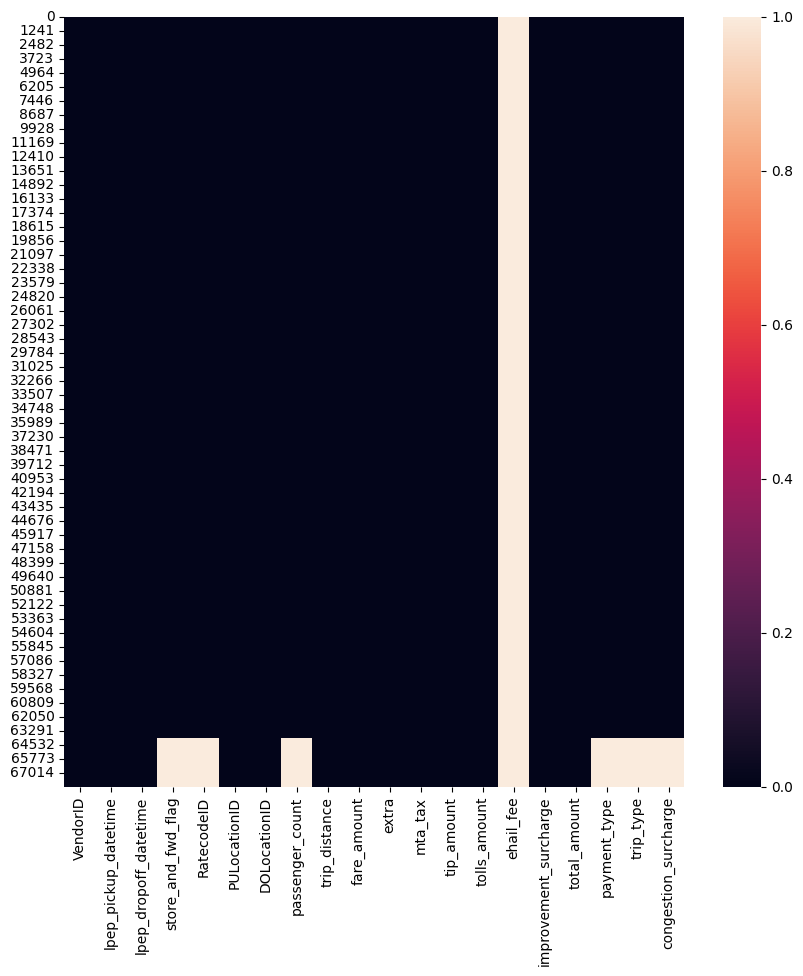

In [145]:
# Sebaran missing value di dalam data
print("Sebaran missing value di dalam data sebelum handling missing value")
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Secara garis besar:  
* *missing value* di kolom `store_and_fwd_flagc`,`RatecodeID`,`passenger_count`,`payment_type`,`trip_type`,`congestion_surcharge` memiliki proporsi yang cukup rendah sekitar 6,3% dan tersebar secara merata di dalam dataset, kita dapat mempertimbangkan penghapusan baris jika hal ini tidak terlalu mengganggu analisis.
* Kolom `ehail_fee` memiliki *missing value* sebesar 100%

Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi *missing value*. 
* Kedua, mengisi data yang hilang. 



### ehail_fee
Kolom ehail_fee kosong. Berdasarkan data dictionary, data ehail_fee ini adalah biaya tambahan sebesar 1 dolar yang otomatis dikenakan untuk setiap perjalanan yang dipesan melalui platform ehail. Dataset ini belum dapat memberikan insight untuk input data kolom ini, sehingga data ini dapat di drop saja.

In [146]:
# Menghapus kolom 'ehail_fee'
df = df.drop(columns=['ehail_fee'])

Kita perlu memastikan bahwa dengan menghapus rows dengan missing balue tidak mempengaruhi analisis kita. Dengan cara:

In [147]:
# Sebelum penghapusan
stats_before = df.describe()


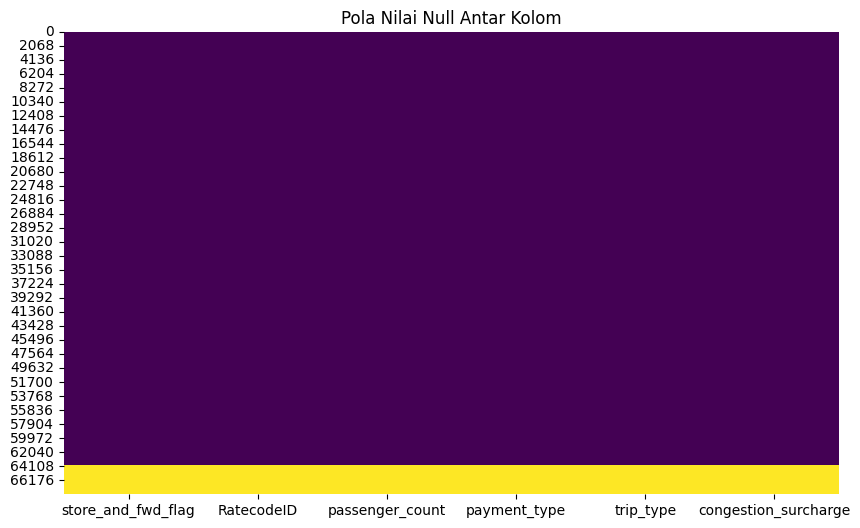

In [148]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge']].isna(), cmap='viridis', cbar=False)
plt.title("Pola Nilai Null Antar Kolom")
plt.show()

In [149]:
# Menghapus baris dengan missing values
df_dropped = df.dropna(subset=['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge'])


In [150]:

# Setelah penghapusan
stats_after = df_dropped.describe()
display(stats_before)
display(stats_after)

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
std,0.351199,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000


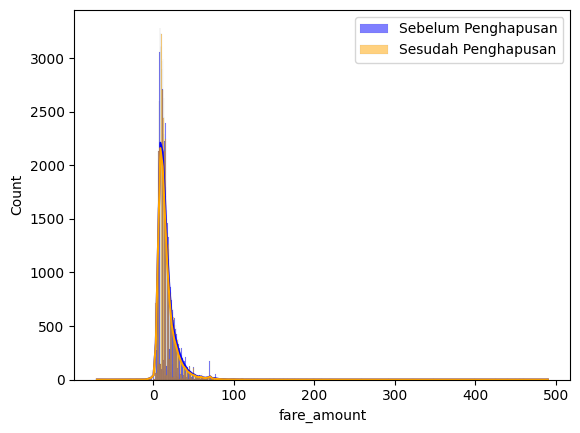

In [151]:

# Kolom yang ingin dibandingkan distribusinya
column = 'fare_amount'

# Distribusi sebelum penghapusan
sns.histplot(df[column], kde=True, color='blue', label='Sebelum Penghapusan')
# Distribusi setelah penghapusan
sns.histplot(df_dropped[column], kde=True, color='orange', label='Sesudah Penghapusan')
plt.legend()
plt.show()


Berdasarkan ringkasa  statistik deskriptif dan distribusi data khususnya pada kolom `fare_amount` penghapusan kolom missing value tidak mempengaruhi analisis secara significant

In [152]:
df = df_dropped

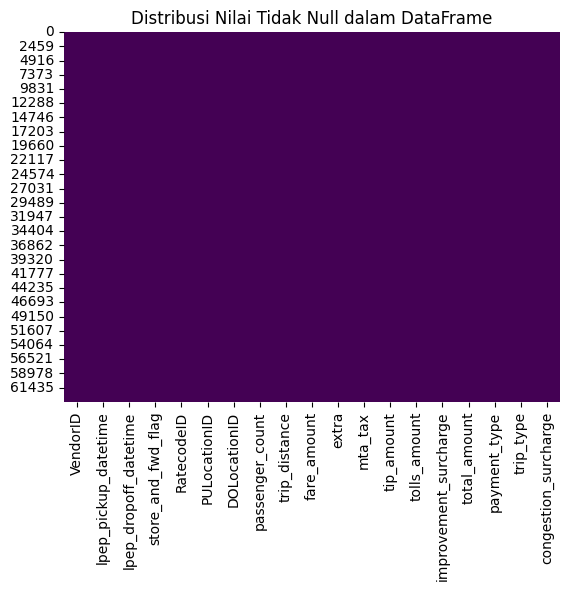

In [153]:
# Data setelah handling missing value
sns.heatmap(~df.isna(), cmap='viridis', cbar=False)
plt.title("Distribusi Nilai Tidak Null dalam DataFrame")
plt.show()

In [154]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
std,0.351199,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000


In [155]:
print("Setelah dilakukan handling missing value, jumlah baris dan kolom dataset ini menjadi: ",df.shape)

Setelah dilakukan handling missing value, jumlah baris dan kolom dataset ini menjadi:  (63877, 19)


### Data duplikat
Dalam dataset ini tidak ada data duplikat

In [156]:
# Mengecek apakah ada data duplikat
has_duplicates = df.duplicated().any()
print("Apakah ada duplikat?:", has_duplicates)

# Menghitung jumlah data duplikat
num_duplicates = df.duplicated().sum()
print("\nJumlah data duplikat:", num_duplicates)

# Menampilkan semua baris duplikat
duplicates = df[df.duplicated(keep=False)]
print("\nData duplikat:")
print(duplicates)

# Mengecek duplikat berdasarkan kolom tertentu
duplicates_subset = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
print("\nData duplikat berdasarkan: \n'lpep_pickup_datetime', \n'lpep_dropoff_datetime', \n'RatecodeID', \n'PULocationID', \n'DOLocationID', \n'passenger_count' dan \n'trip_distance'")
display(duplicates_subset)



Apakah ada duplikat?: False

Jumlah data duplikat: 0

Data duplikat:
Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []

Data duplikat berdasarkan: 
'lpep_pickup_datetime', 
'lpep_dropoff_datetime', 
'RatecodeID', 
'PULocationID', 
'DOLocationID', 
'passenger_count' dan 
'trip_distance'


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,0.0,0.5,0.0,0.0,1.0,4.5,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,0.5,0.5,0.0,0.0,0.3,3.8,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,1.0,0.5,0.0,0.0,1.0,6.2,3.0,1.0,0.0
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.0,0.0,0.0,0.0,0.0,-1.0,-11.0,4.0,2.0,0.0


Berdasarkan analisa diatas, dataset tidak memiliki data duplikasi di setiap kolomnya, namun memiliki duplikasi sebanyak 348 row berdasarkan kolom 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count' dan 'trip_distance'. Hal ini disebabkan data fare amount memiliki value positif dan negatif.

In [157]:
result = pd.DataFrame({
    'feature': df.columns.values,
    'neg_value(%)': [
        len(df[col][df[col] < 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 
        for col in df.columns
    ],


}).round(1)

display(result)

,feature,neg_value(%)
0,VendorID,0.0
1,lpep_pickup_datetime,0.0
2,lpep_dropoff_datetime,0.0
3,store_and_fwd_flag,0.0
4,RatecodeID,0.0
5,PULocationID,0.0
6,DOLocationID,0.0
7,passenger_count,0.0
8,trip_distance,0.0
9,fare_amount,0.3


In [158]:
# Memfilter baris yang memiliki fare_amount positif
df_positive_fare = df[df['fare_amount'] > 0]

# Menghapus duplikat berdasarkan subset kolom 
df_positive_fare = df_positive_fare.drop_duplicates(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep='last')

# df_positive_fare sekarang berisi data tanpa duplikasi negatif
display(df_positive_fare)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [159]:
#Memastikan bahwa sudah tidak ada data fare amount negatif
df = df_positive_fare

# Memfilter baris yang memiliki fare_amount negatif
df_negative_fare = (df[df['fare_amount'] < 0]).sum()
print("Cheeck Data negatif")
df_negative_fare

Cheeck Data negatif


VendorID                   0
lpep_pickup_datetime       0
lpep_dropoff_datetime      0
store_and_fwd_flag         0
RatecodeID               0.0
PULocationID               0
DOLocationID               0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: object

In [160]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


### Nilai Negatif & Nilai Zero

In [161]:
result = pd.DataFrame({
    'feature': df.columns.values,
    'neg_value(%)': [
        len(df[col][df[col] < 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 
        for col in df.columns
    ],
}).round(1)

display(result)


,feature,neg_value(%)
0,VendorID,0.0
1,lpep_pickup_datetime,0.0
2,lpep_dropoff_datetime,0.0
3,store_and_fwd_flag,0.0
4,RatecodeID,0.0
5,PULocationID,0.0
6,DOLocationID,0.0
7,passenger_count,0.0
8,trip_distance,0.0
9,fare_amount,0.0


In [162]:
result = pd.DataFrame({
    'feature': df.columns.values,
    'zero_value(%)': [
        len(df[col][df[col] == 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 
        for col in df.columns
    ]
}).round(1)

display(result)


,feature,zero_value(%)
0,VendorID,0.0
1,lpep_pickup_datetime,0.0
2,lpep_dropoff_datetime,0.0
3,store_and_fwd_flag,0.0
4,RatecodeID,0.0
5,PULocationID,0.0
6,DOLocationID,0.0
7,passenger_count,0.5
8,trip_distance,4.8
9,fare_amount,0.0


* Kolom `passenger_count` seharusnya tidak memiliki nilai 0. Nilai 0 ini dapat kita ubah menjadi median data penumpang
* Berdasarkan data dictionary, Kolom `extra`,`mta_tax`,`tip_amount`,`tolls_amount`,`congestion_surcharge` dapat bernilai kosong pada database ini.


### Passenger count 


In [163]:
print("passenger_count yang memiliki value 0 Sebelum data diganti")
print((df['passenger_count']==0).value_counts())

passenger_count yang memiliki value 0 Sebelum data diganti
passenger_count
False    63288
True       335
Name: count, dtype: int64


In [164]:
# Hitung nilai median dari kolom 'passenger_count'
median_passenger_count = df['passenger_count'].median()

# Ganti nilai 0 dengan median
df['passenger_count'] = df['passenger_count'].replace(0, median_passenger_count)

print("passenger_count yang memiliki value 0 Sesudah data diganti")
print((df['passenger_count']==0).value_counts())

passenger_count yang memiliki value 0 Sesudah data diganti
passenger_count
False    63623
Name: count, dtype: int64


### Trip Distance
Belum bisa ditentukan nilai trip distance 0, karna PU location dan DU location tidak bisa diketahui berapa jarak antar lokasi Pickup dan dropoff. Sehingga kita dapat menghilangkan nilai 0 pada trip distance

In [165]:
print("Trip_distance yang memiliki value 0 Sebelum data diganti")
print((df['trip_distance']==0).value_counts())

Trip_distance yang memiliki value 0 Sebelum data diganti
trip_distance
False    60559
True      3064
Name: count, dtype: int64


In [166]:
# Hapus baris di mana trip_distance bernilai 0
df = df[df['trip_distance'] != 0]

print("Trip_distance yang memiliki value 0 Sebelum data diganti")
print((df['trip_distance']==0).value_counts())

Trip_distance yang memiliki value 0 Sebelum data diganti
trip_distance
False    60559
Name: count, dtype: int64


In [167]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,60559.000000,60559.000000,60559.00000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000,60559.000000
mean,1.872785,1.068528,96.55346,138.157053,1.330025,2.714720,15.925558,0.914901,0.618157,2.103404,0.130617,0.955557,21.175931,1.370680,1.013937,0.759648
std,0.333216,0.508906,58.84453,76.606187,0.988441,6.912073,12.163076,1.303209,0.340419,2.953668,0.962631,0.171631,14.186971,0.495546,0.117230,1.229563
min,1.000000,1.000000,3.00000,1.000000,1.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,74.00000,74.000000,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.750000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.00000,138.000000,1.000000,1.890000,12.800000,0.000000,0.500000,1.640000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,112.00000,223.000000,1.000000,3.160000,19.100000,2.500000,0.500000,3.280000,0.000000,1.000000,25.350000,2.000000,1.000000,2.750000
max,2.000000,5.000000,265.00000,265.000000,8.000000,1571.970000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.750000


In [173]:
print("Setelah dilakukan handling data zero, jumlah baris dan kolom dataset ini menjadi: ",df.shape)

Setelah dilakukan handling data zero, jumlah baris dan kolom dataset ini menjadi:  (60559, 19)


### Data Tanggal


### Outlier



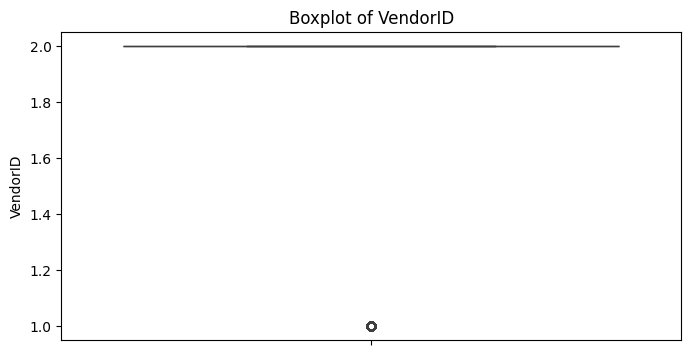

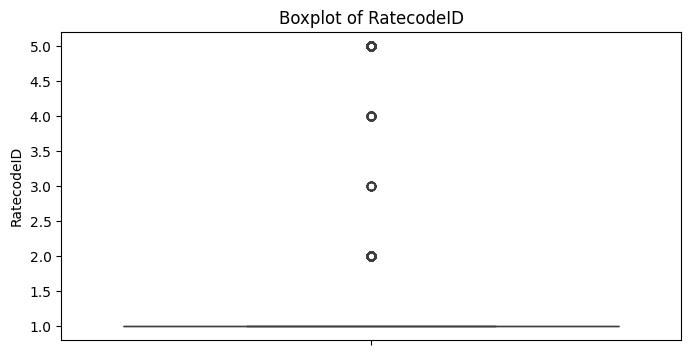

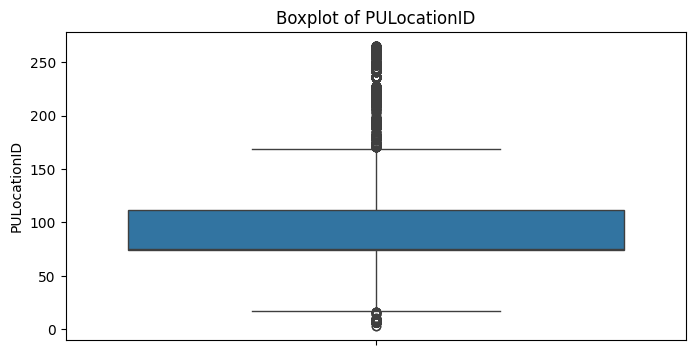

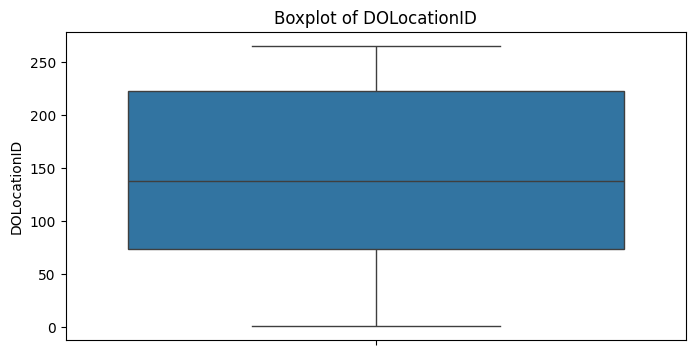

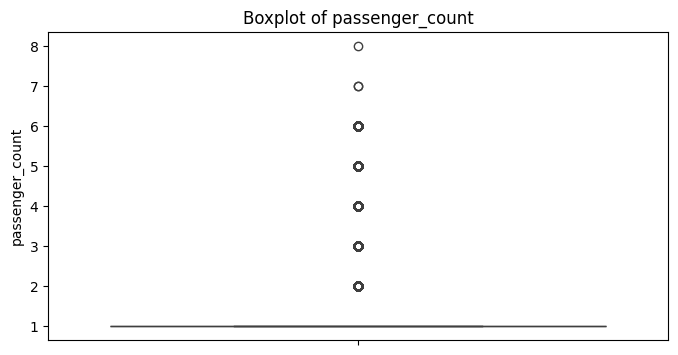

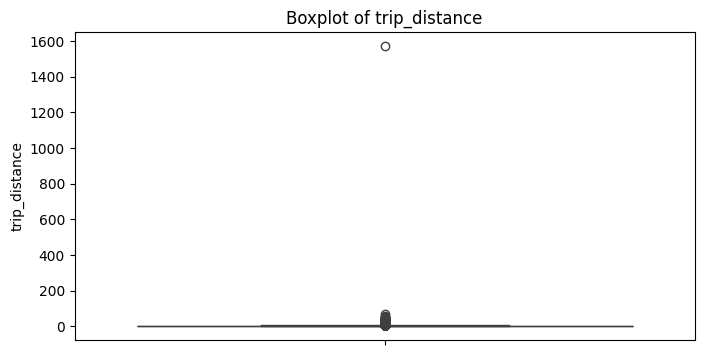

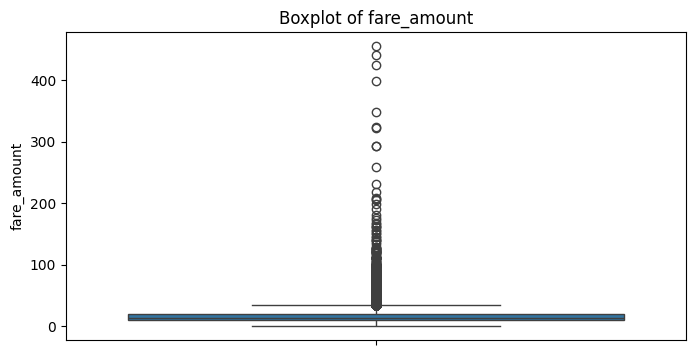

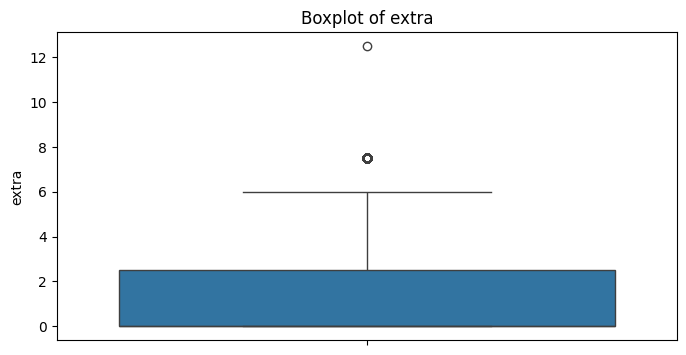

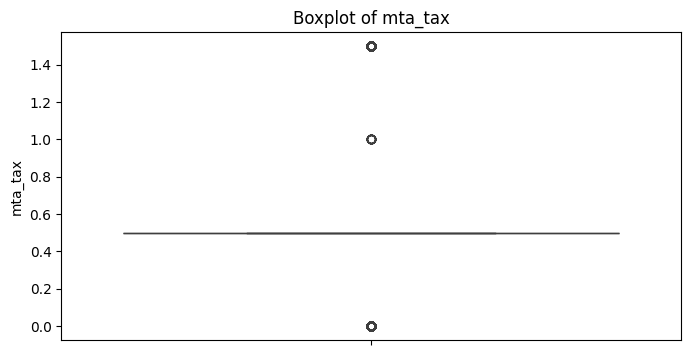

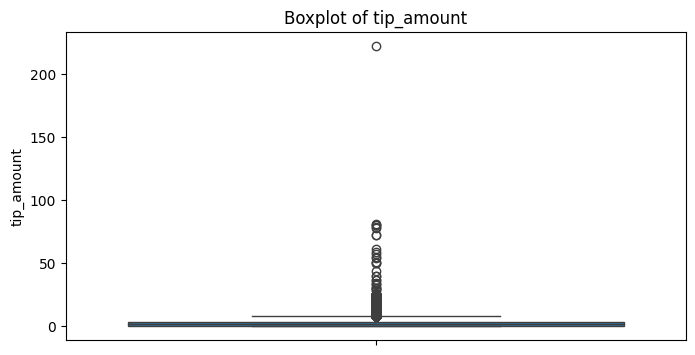

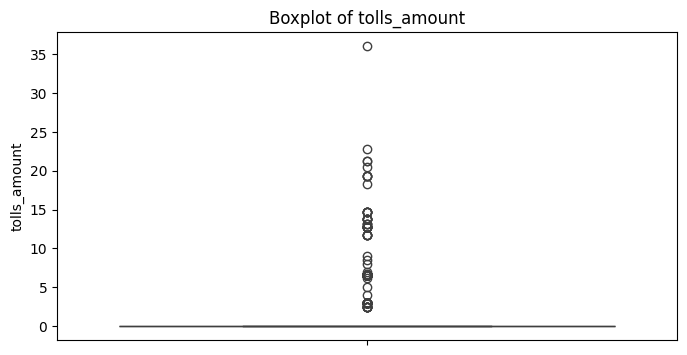

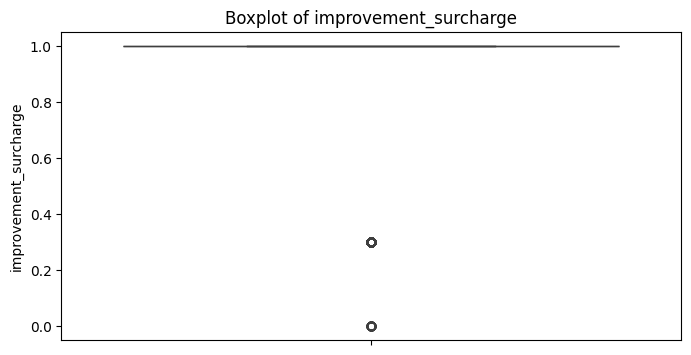

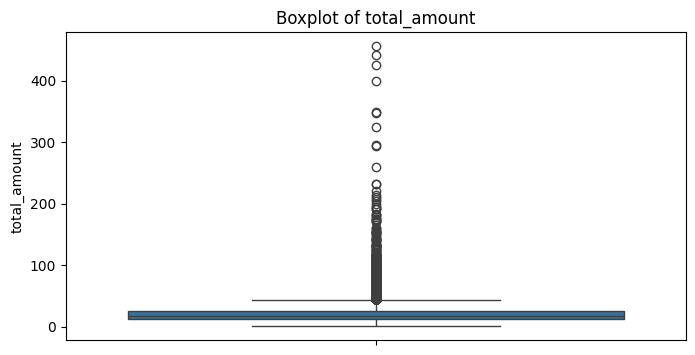

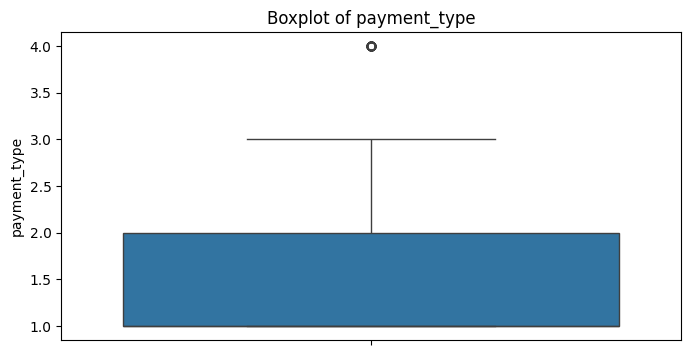

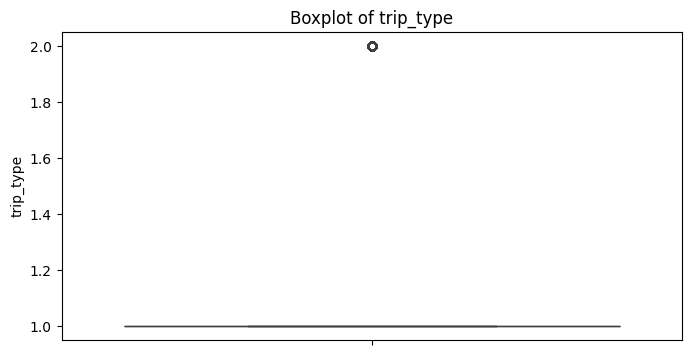

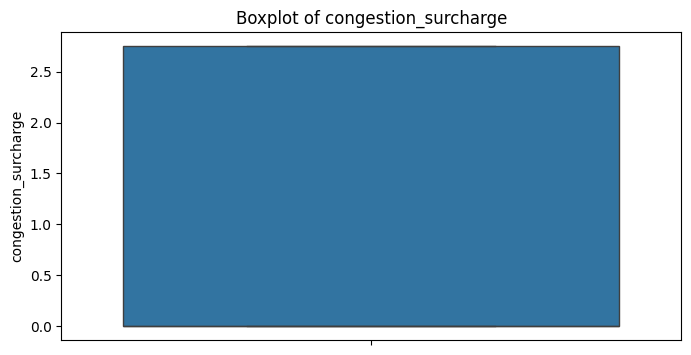

In [168]:
# Membuat figure dengan grid 1 kolom dan 1 baris (satu per satu)
for k, v in df.select_dtypes(include=[np.number]).items():
    plt.figure(figsize=(8, 4)) 
    sns.boxplot(y=k, data=df)
    plt.title(f"Boxplot of {k}")
    plt.show() 

Berdasarkan boxplot di atas, dapat disimpulkan dataset terdapat banyak outliers. Namun untuk saat ini kita akan keep data outlier berikut.

In [169]:
# Handling outlier

### lpep_pickup_datetime & lpep_dropoff_datetime
Merubah tipe kolom `lpep_pickup_datetime` & `lpep_dropoff_datetime` dari object menjadi date time. Dan hanya mengambil tanggal diatas 2023-01-01.

In [195]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df_filtered = df[df['lpep_pickup_datetime'] >= '2023-01-01']
df_filtered = df[df['lpep_dropoff_datetime'] >= '2023-01-01']

df = df_filtered


## Data yang sudah bersih

In [196]:
listItem = []
for col in df.columns:
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),                        # Jumlah nilai null
        df[col].nunique(),                            # Jumlah nilai unik
        list(df[col].drop_duplicates().values[:5]),   # Sampel data unik (maksimal 5)
        (df[col] == 0).sum() if np.issubdtype(df[col].dtype, np.number) else 'N/A',  # Jumlah nilai 0 (jika numerik)
        (df[col] < 0).sum() if np.issubdtype(df[col].dtype, np.number) else 'N/A',   # Jumlah nilai negatif (jika numerik)
        df[col].duplicated().sum()                   # Jumlah duplikat
    ])

# Buat DataFrame deskriptif
dfDesc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample', 'zero', 'negative', 'duplicates'],
    data=listItem
)

print(df.shape)
dfDesc


(60556, 22)


,dataFeatures,dataType,null,unique,uniqueSample,zero,negative,duplicates
0,VendorID,int64,0,2,"[2, 1]",0,0,60554
1,lpep_pickup_datetime,datetime64[ns],0,59634,"[2023-01-01T00:26:10.000000000, 2023-01-01T00:...",N/A,N/A,922
2,lpep_dropoff_datetime,datetime64[ns],0,59542,"[2023-01-01T00:37:11.000000000, 2023-01-01T00:...",N/A,N/A,1014
3,store_and_fwd_flag,object,0,2,"[N, Y]",N/A,N/A,60554
4,RatecodeID,float64,0,5,"[1.0, 5.0, 4.0, 3.0, 2.0]",0,0,60551
5,PULocationID,int64,0,186,"[166, 24, 41, 181, 255]",0,0,60370
6,DOLocationID,int64,0,244,"[143, 43, 238, 74, 262]",0,0,60312
7,passenger_count,float64,0,8,"[1.0, 2.0, 4.0, 3.0, 6.0]",0,0,60548
8,trip_distance,float64,0,1722,"[2.58, 1.81, 1.3, 1.1, 2.78]",0,0,58834
9,fare_amount,float64,0,358,"[14.9, 10.7, 6.5, 6.0, 17.7]",0,0,60198


In [197]:
df.shape

(60556, 22)

In [238]:
df.to_csv('data_export.csv', index=False)


Sebelum dibersihkan, kita memiliki 68211 baris data, sekarang kita memiliki 60556 baris. Sekitar 7653 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Bagaimana cara mengoptimalkan distribusi armada berdasarkan waktu dan wilayah untuk meningkatkan efisiensi operasional dan pengalaman pengguna?**.  

Analisis akan dilakukan dengan membandingkan data jam pickup, Lokasi pickup dan drop off serta fare_amount dari setiap perjalanan

## Berdasarkan Waktu Pickup Perjalanan terhadap banyaknya perjalanan
Pertama, mari kita lihat bagaimana pengaruh waktu terhadap perjalanan. Kita akan menganalisis kolom `lpep_pickup_datetime` untuk menjawab beberapa pertanyaan:
* Perjalanan terbanyak dan sedikit terjadi ditanggal berapa?
* Perjalanan paling sering dilakukan di hari apa?
* Perjalanan paling sering dilakukan di jam berapa?


In [231]:
# Ekstrak informasi yang dibutuhkan
df['pickup_dayofweek'] = df['lpep_pickup_datetime'].dt.day_name()  # Senin, Selasa, dst.
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour  # Jam saat pickup

# Menghitung jumlah perjalanan per jam
trip_per_hour = df.groupby('pickup_hour').size().reset_index(name='trip_count')




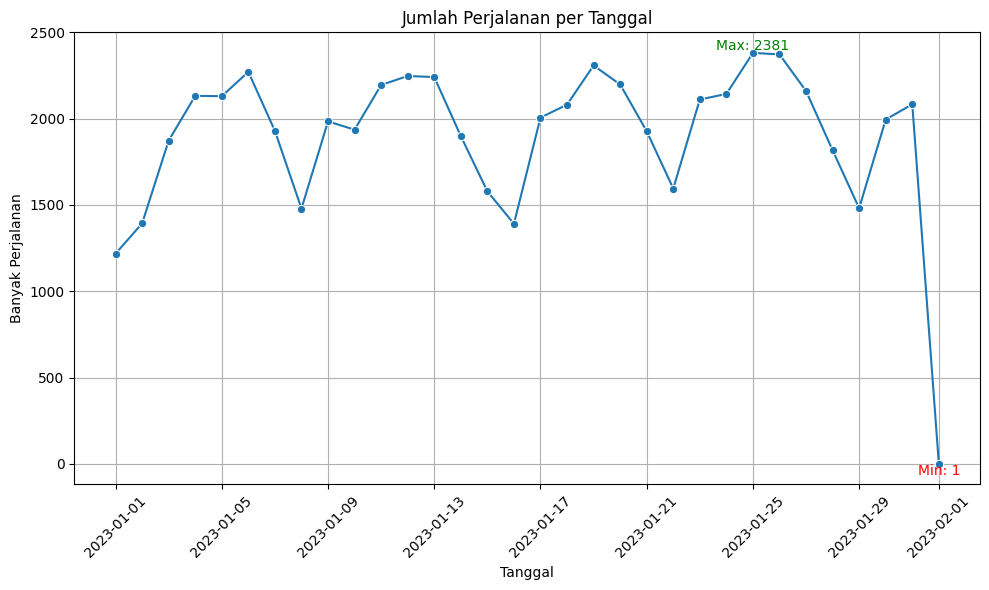

In [227]:

# Mengelompokkan data berdasarkan tanggal dan menghitung banyak perjalanan per tanggal
trip_count_per_day = df.groupby(df['lpep_pickup_datetime'].dt.date).size().reset_index(name='trip_count')

# Mencari nilai tertinggi dan terendah
max_trip = trip_count_per_day.loc[trip_count_per_day['trip_count'].idxmax()]
min_trip = trip_count_per_day.loc[trip_count_per_day['trip_count'].idxmin()]

# Membuat line chart menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='lpep_pickup_datetime', y='trip_count', data=trip_count_per_day, marker='o')

# Menambahkan anotasi untuk data tertinggi dan terendah
plt.text(max_trip['lpep_pickup_datetime'], max_trip['trip_count'], f'Max: {max_trip["trip_count"]}', 
         horizontalalignment='center', verticalalignment='bottom', color='green', fontsize=10)
plt.text(min_trip['lpep_pickup_datetime'], min_trip['trip_count'], f'Min: {min_trip["trip_count"]}', 
         horizontalalignment='center', verticalalignment='top', color='red', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Perjalanan per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Banyak Perjalanan')

# Menampilkan grid untuk memudahkan pembacaan
plt.grid(True)

# Menampilkan chart
plt.xticks(rotation=45)  # Memutar tanggal agar lebih mudah dibaca
plt.tight_layout()  # Menghindari pemotongan label
plt.show()


Insight:
* Perjalanan terbanyak terjadi pada tanggal 2023-01-25 sebanyak 2381 perjalanan
* Perjalanan tesedikit terjadi pada tanggal 2023-02-01 sebanyak 1 perjalanan

In [204]:
# Menghitung jumlah perjalanan per hari
trip_per_day = df.groupby('pickup_dayofweek').size().reset_index(name='trip_count')

# Mengurutkan berdasarkan hari dalam minggu agar tampil dengan urutan yang benar
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trip_per_day['pickup_dayofweek'] = pd.Categorical(trip_per_day['pickup_dayofweek'], categories=day_order, ordered=True)
trip_per_day = trip_per_day.sort_values('pickup_dayofweek')

# Menampilkan hasil
print(trip_per_day)


  pickup_dayofweek  trip_count
1           Monday        8874
5          Tuesday       10041
6        Wednesday        8790
4         Thursday        9057
0           Friday        8870
2         Saturday        7572
3           Sunday        7352


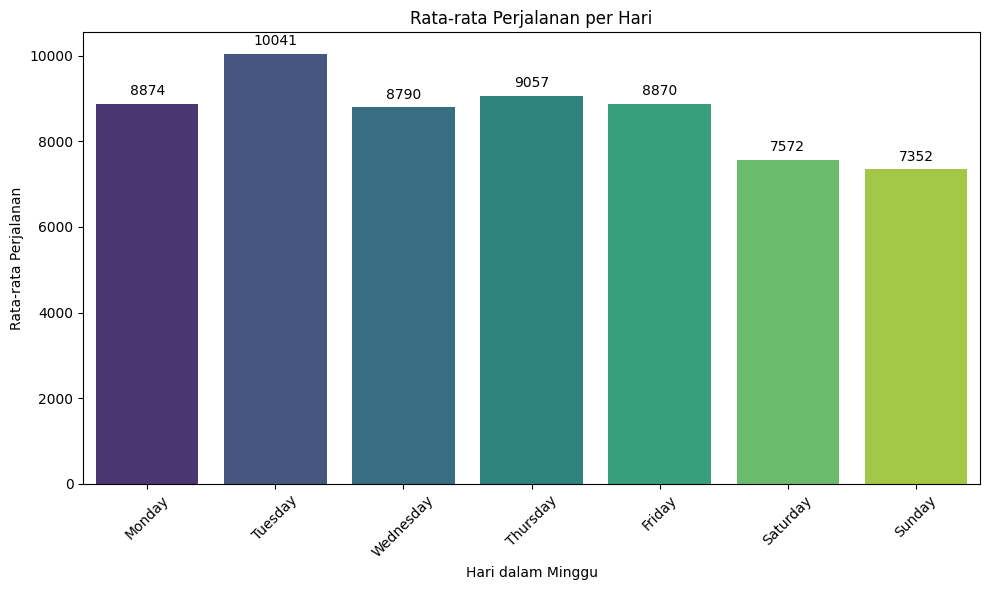

In [232]:

# Menghitung rata-rata perjalanan per hari
avg_trip_per_day = trip_per_day.groupby('pickup_dayofweek')['trip_count'].mean().reset_index()

# Membuat bar plot untuk visualisasi rata-rata perjalanan per hari
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='pickup_dayofweek', y='trip_count', data=avg_trip_per_day, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Perjalanan per Hari')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Rata-rata Perjalanan')

# Menambahkan data pada setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 9), textcoords='offset points')

# Menampilkan chart
plt.xticks(rotation=45)  # Memutar label hari agar lebih mudah dibaca
plt.tight_layout()  # Menghindari pemotongan label
plt.show()


Insight: 
* Rata rata perjalanan tertinggi di hari selasa, sebanyak 10041 perjalanan
* Rata rata perjalaan terendah pada hari minggu, sebanyak 7351 perjalanan
* Perjalanan lebih banyak dilakukan pada weekday dibandingkan weekend

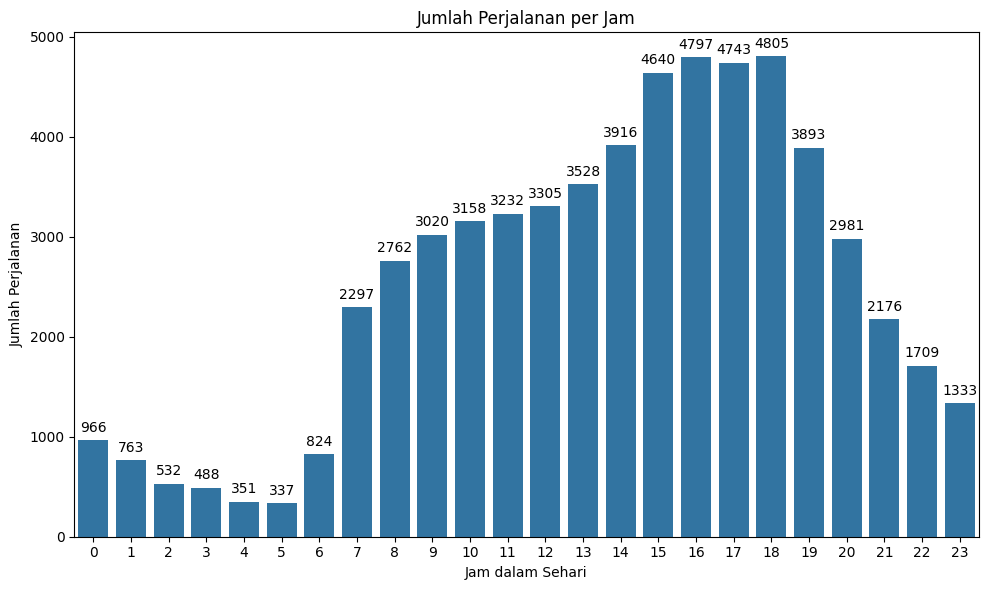

In [228]:

# Membuat bar plot untuk visualisasi jumlah perjalanan per jam
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='pickup_hour', y='trip_count', data=trip_per_hour)

# Menambahkan data pada setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 9), textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Perjalanan per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Perjalanan')

# Menampilkan chart
plt.tight_layout()  # Menghindari pemotongan label
plt.show()


Insight:
* Jam 00:00 hingga 05:00 (Tengah Malam) menunjukan data perjalanan terendah
* jam 06:00 hingga 14:00 (Pagi hingga siang) menunjukan kecenderungan terus naik hingga sore
* Jam 15.00 hingga 18.00 (Sore) menunjukan data perjalanan terbanyak sehingga dapat dianggap menjadi peak hour
* Jam 19:00 hingga 23:00 (Malam) menunjukan frekuensi perjalanan terus menurun.



In [229]:
# Menghitung jumlah perjalanan per kombinasi hari dan jam
trip_per_day_hour = df.groupby(['pickup_dayofweek', 'pickup_hour']).size().reset_index(name='trip_count')

# Menyusun data agar sesuai dengan format heatmap (pivot untuk kombinasi hari dan jam)
heatmap_data = trip_per_day_hour.pivot(index='pickup_dayofweek', columns='pickup_hour', values='trip_count')

# Menyusun urutan hari dalam minggu untuk memastikan urutannya benar
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)



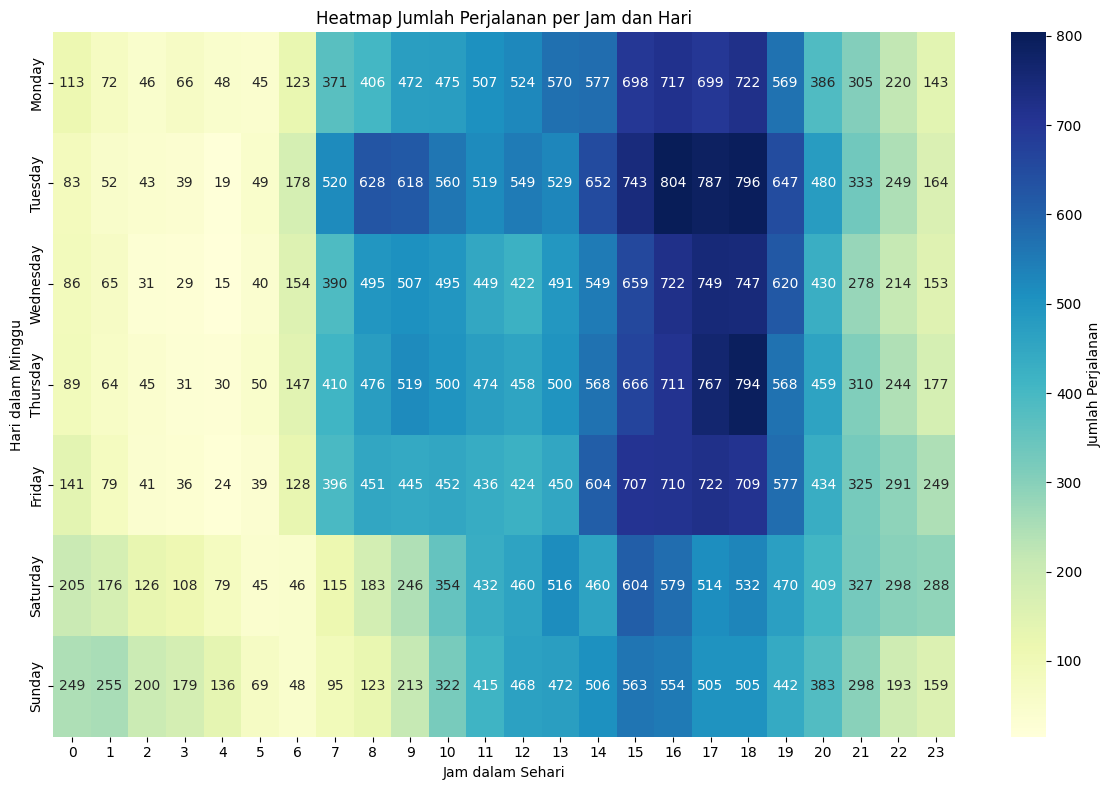

In [230]:


# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Jumlah Perjalanan'})

# Menambahkan judul dan label sumbu
plt.title('Heatmap Jumlah Perjalanan per Jam dan Hari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Hari dalam Minggu')

# Menampilkan chart
plt.tight_layout()
plt.show()


Insight: 
* Selasa dan Kamis Sore (15:00 hingga 18.00) merupakan waktu tersibuk
* Perjalanan paling sepi adalah ketika tengah malam (00:00 hingga 06:00)

## Berdasarkan Lokasi Pickup dan Dropoff


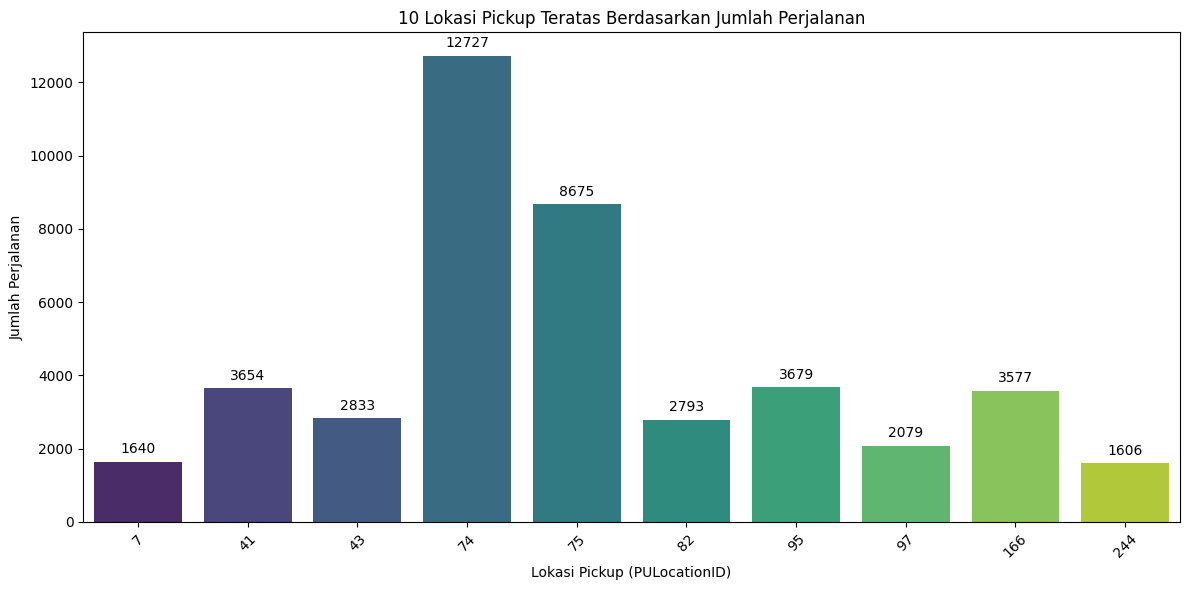

In [236]:

# Mengelompokkan data berdasarkan lokasi pickup dan menghitung jumlah perjalanan per lokasi
trip_per_location = df.groupby('PULocationID').size().reset_index(name='trip_count')

# Menyaring 10 lokasi dengan jumlah perjalanan tertinggi
top_10_locations = trip_per_location.nlargest(10, 'trip_count')

# Membuat bar plot untuk distribusi perjalanan berdasarkan 10 lokasi pickup teratas
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='PULocationID', y='trip_count', data=top_10_locations, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('10 Lokasi Pickup Teratas Berdasarkan Jumlah Perjalanan')
plt.xlabel('Lokasi Pickup (PULocationID)')
plt.ylabel('Jumlah Perjalanan')

# Menambahkan data pada setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 9), textcoords='offset points')

# Menampilkan chart
plt.xticks(rotation=45)  # Memutar label agar lebih mudah dibaca
plt.tight_layout()  # Menghindari pemotongan label
plt.show()


Insight:
* Lokasi Pickup tertinggi pertama adalah lokasi 74 sebanyak 12727 perjalanan
* Lokasi Pickup tertinggi kedua adalah lokasi 75 sebanyak 8675 perjalanan

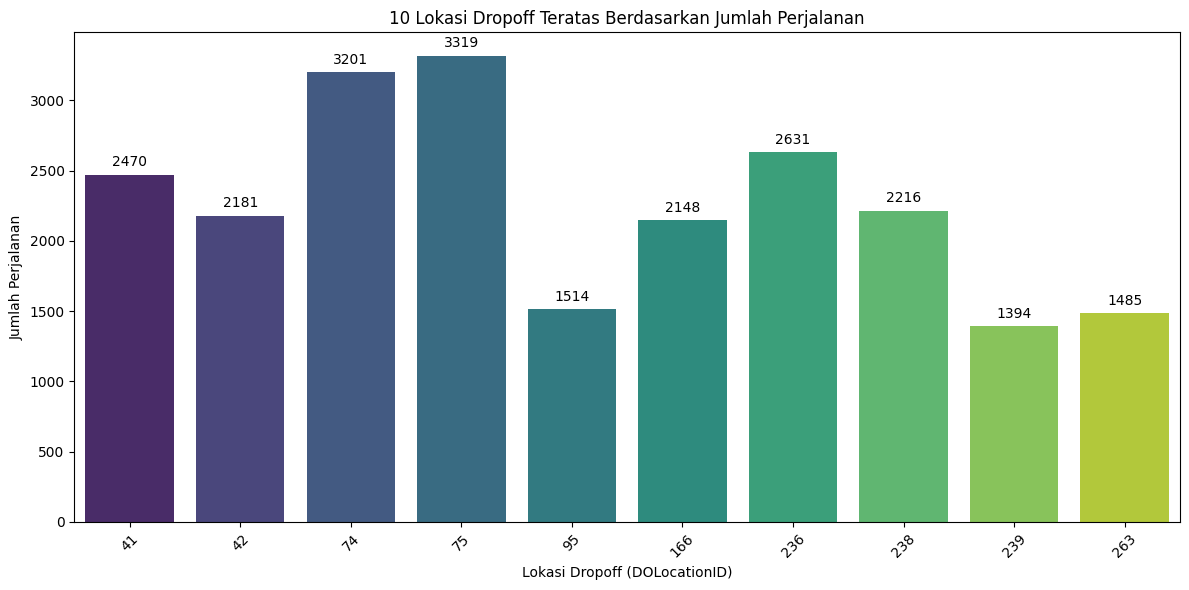

In [237]:

# Mengelompokkan data berdasarkan lokasi dropoff dan menghitung jumlah perjalanan per lokasi
trip_per_dropoff = df.groupby('DOLocationID').size().reset_index(name='trip_count')

# Menyaring 10 lokasi dropoff dengan jumlah perjalanan tertinggi
top_10_dropoff_locations = trip_per_dropoff.nlargest(10, 'trip_count')

# Membuat bar plot untuk distribusi perjalanan berdasarkan 10 lokasi dropoff teratas
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='DOLocationID', y='trip_count', data=top_10_dropoff_locations, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('10 Lokasi Dropoff Teratas Berdasarkan Jumlah Perjalanan')
plt.xlabel('Lokasi Dropoff (DOLocationID)')
plt.ylabel('Jumlah Perjalanan')

# Menambahkan data pada setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 9), textcoords='offset points')

# Menampilkan chart
plt.xticks(rotation=45)  # Memutar label agar lebih mudah dibaca
plt.tight_layout()  # Menghindari pemotongan label
plt.show()


Insight:
* Lokasi Pickup tertinggi pertama adalah lokasi 75 sebanyak 3319 perjalanan
* Lokasi Pickup tertinggi kedua adalah lokasi 74 sebanyak 3201 perjalanan

Berikut adalah kesimpulan, rekomendasi, dan rekomendasi actionable untuk **Manajer Operasional Armada** dalam pengambilan keputusan berbasis data yang dapat meningkatkan efisiensi dan efektivitas armada:

### Kesimpulan
1. **Wilayah dengan Permintaan Tinggi**:
   - Lokasi pickup 75 dan 74 menunjukkan permintaan perjalanan yang tinggi, terutama pada jam sibuk sore (15:00-18:00), dan secara khusus pada hari Selasa dan Kamis. Sebaliknya, permintaan menurun pada akhir pekan dan tengah malam (00:00-6:00).

2. **Penyesuaian Tarif**:
   - Ada fluktuasi permintaan berdasarkan waktu dan lokasi, terutama di area dengan aktivitas tinggi selama jam sibuk. Penyesuaian tarif yang dinamis dapat menjadi strategi untuk mengelola permintaan secara efisien.

3. **Kebutuhan Layanan Tambahan**:
   - Area dengan permintaan tinggi cenderung memerlukan layanan tambahan seperti kendaraan berkapasitas besar atau layanan pelanggan yang cepat dan responsif untuk memenuhi kebutuhan pengguna.

4. **Efisiensi Operasional**:
   - Analisis distribusi perjalanan dan pola waktu menunjukkan potensi penghematan biaya jika armada dikelola secara strategis. Optimalisasi lokasi armada dapat mengurangi waktu tunggu dan jarak perjalanan kosong.

### Rekomendasi
1. **Optimalisasi Distribusi Armada**:
   - Distribusikan lebih banyak kendaraan di lokasi 74 dan 75 selama jam sibuk sore hari. Pertimbangkan sistem rotasi armada untuk mengatasi fluktuasi permintaan di area yang ramai pada waktu tertentu.

2. **Penyesuaian Tarif Berdasarkan Waktu dan Wilayah**:
   - Terapkan tarif dinamis pada jam sibuk di area dengan permintaan tinggi. Tarif yang lebih tinggi dapat diterapkan pada puncak permintaan untuk meningkatkan pendapatan, sementara tarif yang lebih rendah dapat diterapkan pada waktu lengang untuk mendorong penggunaan yang merata.

3. **Layanan Tambahan untuk Meningkatkan Pengalaman Pengguna**:
   - Sediakan kendaraan berkapasitas besar atau ramah lingkungan di area tertentu. Kembangkan juga fitur estimasi waktu kedatangan di aplikasi untuk meningkatkan kenyamanan pengguna.

4. **Peningkatan Efisiensi Operasional**:
   - Gunakan data analitik untuk memetakan pola permintaan sehingga armada dapat dialokasikan lebih tepat. Pengurangan perjalanan kosong akan mengurangi biaya bahan bakar dan perawatan. Implementasikan sistem prediktif untuk mempersiapkan distribusi armada lebih baik sebelum jam sibuk.

### Rekomendasi Actionable
1. **Implementasi Sistem Pemantauan Real-Time**:
   - Pasang sensor atau gunakan data aplikasi untuk melacak distribusi dan penggunaan armada secara real-time, memungkinkan penyesuaian distribusi secara langsung sesuai permintaan.

2. **Pengembangan Tarif Dinamis**:
   - Uji coba model tarif dinamis di area permintaan tinggi selama jam sibuk dan evaluasi dampaknya terhadap distribusi permintaan dan pendapatan.

3. **Pelatihan untuk Pengemudi dan Tim Operasional**:
   - Berikan pelatihan khusus bagi pengemudi di area permintaan tinggi agar mereka dapat mengelola pelanggan dengan baik selama jam sibuk dan memahami preferensi pelanggan di area tersebut.

4. **Optimasi Rute dan Distribusi Armada Berbasis Data**:
   - Gunakan data historis untuk memprediksi area dan waktu dengan permintaan tinggi. Terapkan algoritma optimasi rute untuk memastikan armada tersebar secara efisien di area yang membutuhkan.

Dengan strategi-strategi ini, **Manajer Operasional Armada** dapat memaksimalkan efektivitas armada, meningkatkan pendapatan, serta mengoptimalkan pengalaman pengguna, terutama pada jam sibuk sore hari dan hari kerja dengan permintaan tinggi.
